In [7]:
# inline plotting
%matplotlib inline

# allow live package editing
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import numpy as np
import matplotlib.pyplot as plt

import opendsm as odsm
from opendsm import eemeter as em

print(f"OpenDSM {odsm.__version__}")

OpenDSM 1.2.6


In [9]:

# contains baseline and reporting data for 100 meters
df_baseline, df_reporting =  odsm.test_data.load_test_data("daily_treatment_data")

In [10]:
df_baseline

temperature      observed
id     datetime                                            
108618 2018-01-01 00:00:00-06:00    -2.384038  16635.193673
       2018-01-02 00:00:00-06:00     1.730000  15594.051162
       2018-01-03 00:00:00-06:00    13.087946  11928.025899
       2018-01-04 00:00:00-06:00     4.743269  14399.333812
       2018-01-05 00:00:00-06:00     4.130577  14315.101721
...                                       ...           ...
120841 2018-12-27 00:00:00-06:00    52.010625   1153.749811
       2018-12-28 00:00:00-06:00    35.270000   1704.076968
       2018-12-29 00:00:00-06:00    29.630000   2151.225729
       2018-12-30 00:00:00-06:00    34.250000   1331.123954
       2018-12-31 00:00:00-06:00    43.311250   1723.397349

[36500 rows x 2 columns]

In [11]:
df_reporting

temperature     observed
id     datetime                                           
108618 2019-01-01 00:00:00-06:00    -2.384038  9294.220619
       2019-01-02 00:00:00-06:00     1.730000  8073.766329
       2019-01-03 00:00:00-06:00    13.087946  5261.174665
       2019-01-04 00:00:00-06:00     4.743269  6775.499525
       2019-01-05 00:00:00-06:00     4.130577  6735.513000
...                                       ...          ...
120841 2019-12-27 00:00:00-06:00    52.010625   867.424857
       2019-12-28 00:00:00-06:00    35.270000  1355.458931
       2019-12-29 00:00:00-06:00    29.630000  1627.092533
       2019-12-30 00:00:00-06:00    34.250000  1034.703100
       2019-12-31 00:00:00-06:00    43.311250  1196.767320

[36500 rows x 2 columns]

In [ ]:
df_baseline_108618 = df_baseline.loc[108618]
df_baseline_108618

KeyError: 15

In [7]:
df_reporting_108618 = df_reporting.loc[108618]
df_reporting_108618

,temperature,observed
datetime,,
2019-01-01 00:00:00-06:00,-2.384038,9294.220619
2019-01-02 00:00:00-06:00,1.730000,8073.766329
2019-01-03 00:00:00-06:00,13.087946,5261.174665
2019-01-04 00:00:00-06:00,4.743269,6775.499525
2019-01-05 00:00:00-06:00,4.130577,6735.513000
...,...,...
2019-12-27 00:00:00-06:00,46.602066,1844.233939
2019-12-28 00:00:00-06:00,38.346724,2342.293565
2019-12-29 00:00:00-06:00,28.614456,1977.683581


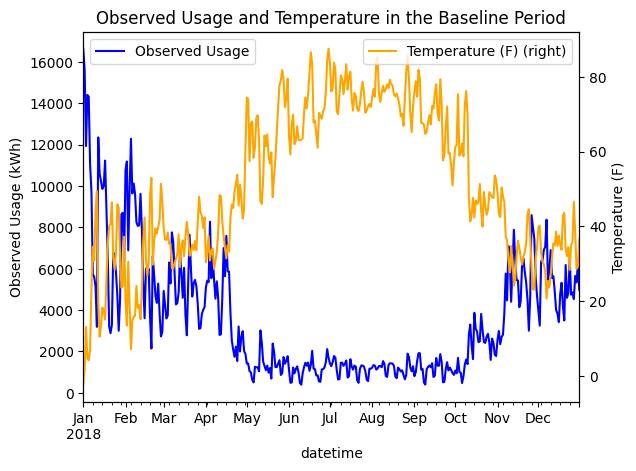

In [ ]:
ax = df_baseline_108618['observed'].plot(label='Observed Usage', color='blue')
df_baseline_108618['temperature'].plot(ax=ax, secondary_y=True, label='Temperature (F)', color='orange')

ax.set_ylabel('Observed Usage (kWh)')
ax.right_ax.set_ylabel('Temperature (F)')

ax.legend(loc='upper left')
ax.right_ax.legend(loc='upper right')

plt.title('Observed Usage and Temperature in the Baseline Period')
plt.savefig('baseline_data_daily.png')
plt.show()

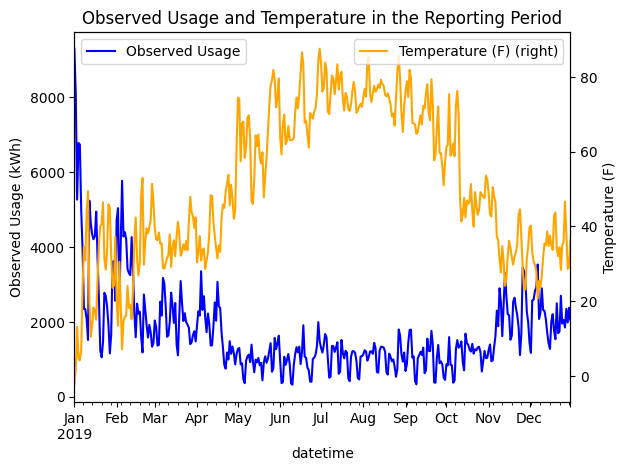

In [9]:
ax = df_reporting_108618['observed'].plot(label='Observed Usage', color='blue')
df_reporting_108618['temperature'].plot(ax=ax, secondary_y=True, label='Temperature (F)', color='orange')

ax.set_ylabel('Observed Usage (kWh)')
ax.right_ax.set_ylabel('Temperature (F)')

ax.legend(loc='upper left')
ax.right_ax.legend(loc='upper right')

plt.title('Observed Usage and Temperature in the Reporting Period')
plt.savefig('reporting_data_daily.png')
plt.show()

In [ ]:
baseline_data = em.DailyBaselineData(df_baseline_108618, is_electricity_data=True)
reporting_data = em.DailyReportingData(df_reporting_108618, is_electricity_data=True)

In [ ]:
# note that you can also create these objects from individual series instead of a single dataframe
baseline_data = em.DailyBaselineData.from_series(df_baseline_108618['observed'], df_baseline_108618['temperature'], is_electricity_data=True)

In [12]:
print(f"Disqualifications: {baseline_data.disqualification}")
print(f"Warnings:          {baseline_data.warnings}")

Disqualifications: []
Warnings:          [EEMeterWarning(qualified_name=eemeter.sufficiency_criteria.unable_to_confirm_daily_temperature_sufficiency)]


In [13]:
# can also access the underlying dataframe like so (note that this is a copy)
baseline_data.df.head()

,season,weekday_weekend,temperature,observed
datetime,,,,
2018-01-01 00:00:00-06:00,winter,weekday,-2.384038,16635.193673
2018-01-02 00:00:00-06:00,winter,weekday,1.730000,15594.051162
2018-01-03 00:00:00-06:00,winter,weekday,13.087946,11928.025899
2018-01-04 00:00:00-06:00,winter,weekday,4.743269,14399.333812
2018-01-05 00:00:00-06:00,winter,weekday,4.130577,14315.101721


All models follow the same general format of:

- Initialize
- Fit
- Predict

We can initialize and fit in the same line (like below) as a shorthand or this can be done in separate steps

In [14]:
daily_model = em.DailyModel()
daily_model.fit(baseline_data)

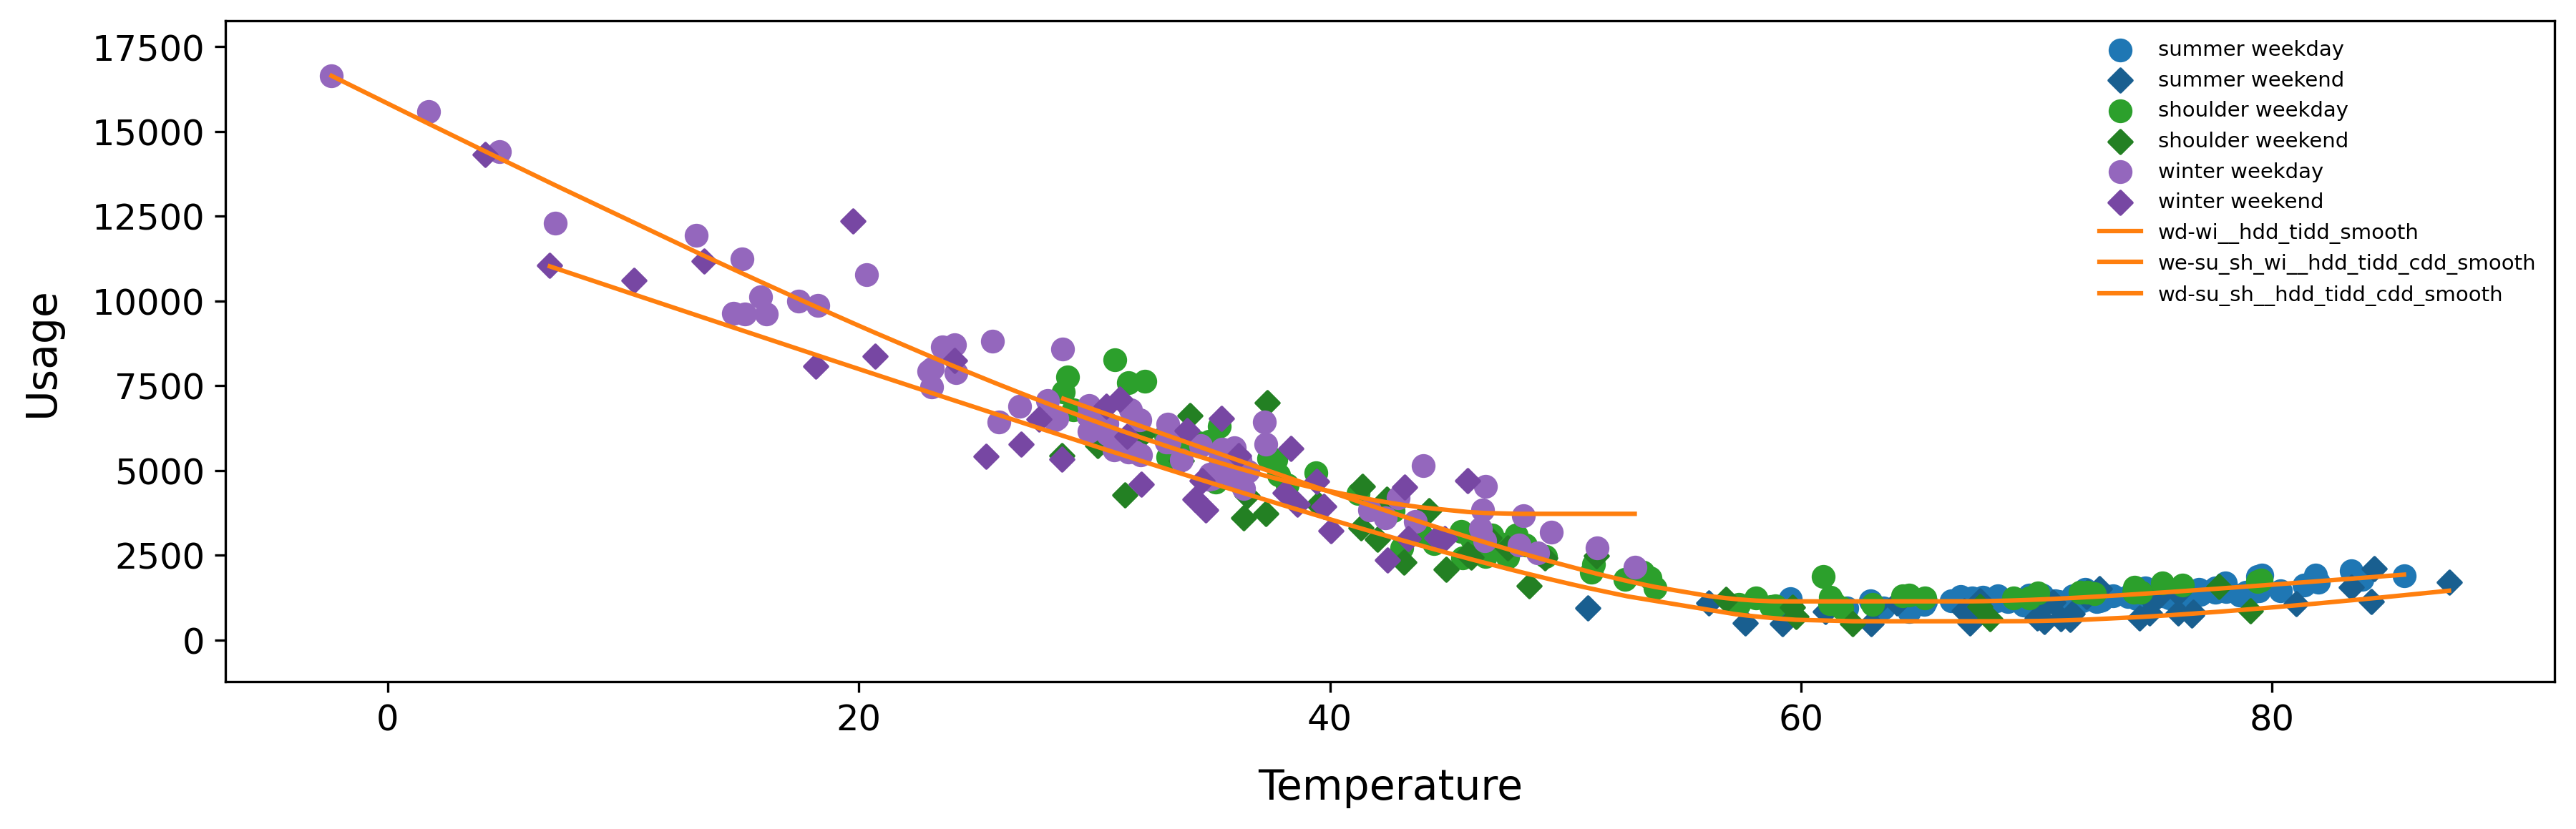

In [15]:
daily_model.plot(baseline_data)

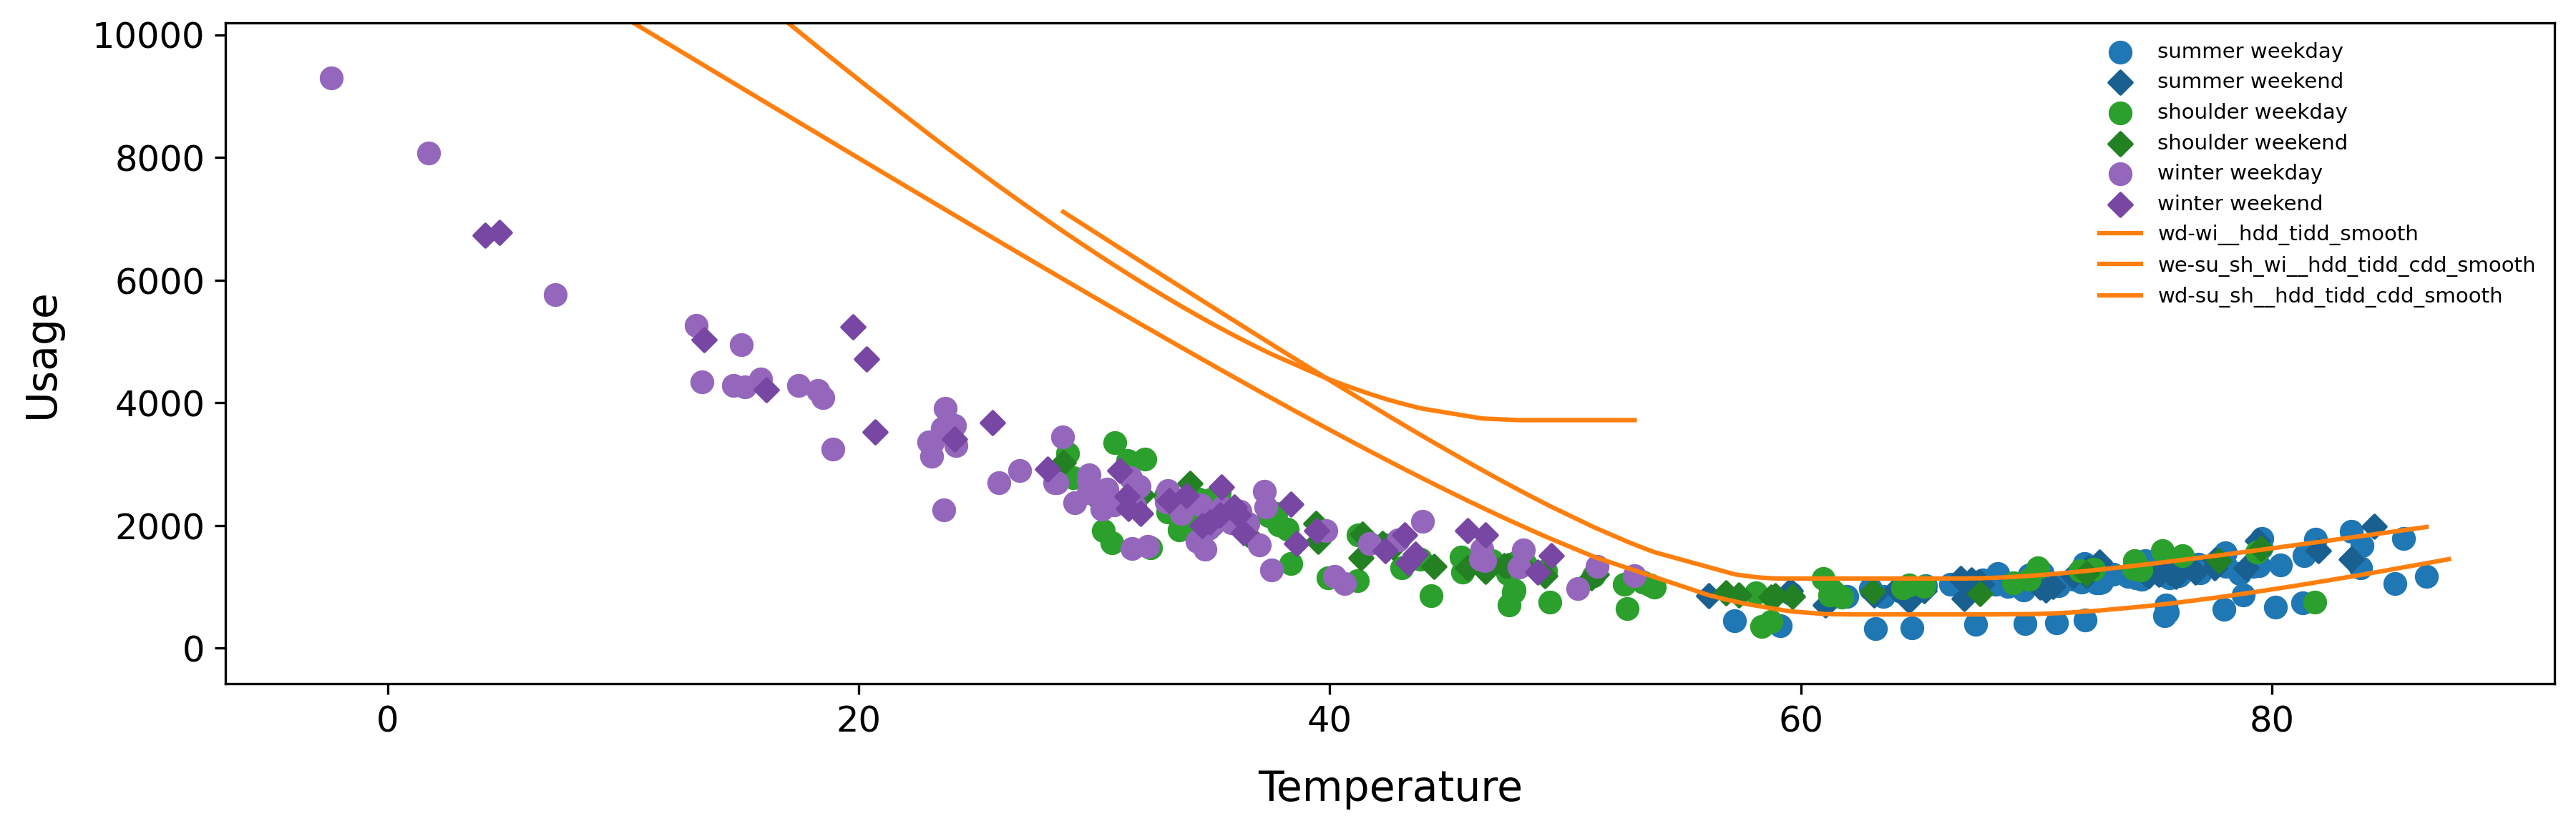

In [16]:
daily_model.plot(reporting_data)

In [17]:
df_results = daily_model.predict(reporting_data)
df_results.head()

,season,day_of_week,weekday_weekend,temperature,observed,predicted,predicted_unc,heating_load,cooling_load,model_split,model_type
datetime,,,,,,,,,,,
2019-01-01 00:00:00-06:00,winter,2,weekday,-2.384038,9294.220619,16638.509114,1460.301908,12921.908882,0.0,wd-wi,hdd_tidd_smooth
2019-01-02 00:00:00-06:00,winter,3,weekday,1.730000,8073.766329,15227.903959,1460.301908,11511.303728,0.0,wd-wi,hdd_tidd_smooth
2019-01-03 00:00:00-06:00,winter,4,weekday,13.087946,5261.174665,11441.488493,1460.301908,7724.888262,0.0,wd-wi,hdd_tidd_smooth
2019-01-04 00:00:00-06:00,winter,5,weekday,4.743269,6775.499525,14205.397484,1460.301908,10488.797253,0.0,wd-wi,hdd_tidd_smooth
2019-01-05 00:00:00-06:00,winter,6,weekend,4.130577,6735.513000,11656.035117,1227.223842,11107.820837,0.0,we-su_sh_wi,hdd_tidd_cdd_smooth


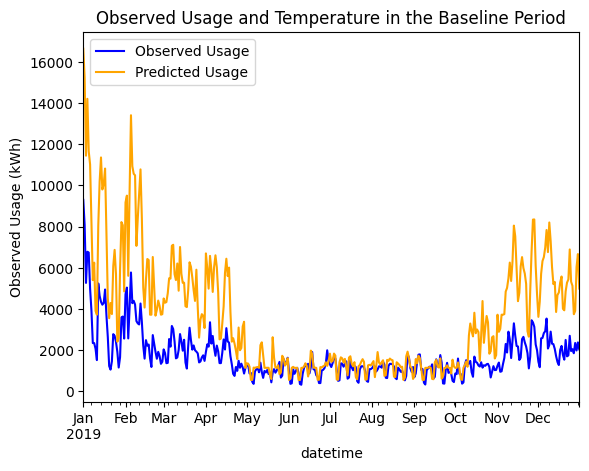

In [18]:
ax = df_results['observed'].plot(label='Observed Usage', color='blue')
df_results['predicted'].plot(ax=ax, label='Predicted Usage', color='orange')

ax.set_ylabel('Observed Usage (kWh)')
ax.legend(loc='upper left')
plt.title('Observed Usage and Temperature in the Baseline Period')
plt.savefig('predicted_vs_observed_daily.png')
plt.show()

In [19]:
df_results['savings'] = df_results['predicted'] - df_results['observed']
print(f"Predicted Usage (kWh):  {round(df_results['predicted'].sum(), 2)}")
print(f"Observed Usage (kWh):   {round(df_results['observed'].sum(), 2)}")
print(f"Savings (kWh):          {round(df_results['savings'].sum(), 2)}")


Predicted Usage (kWh):  1297836.52
Observed Usage (kWh):   632077.62
Savings (kWh):          665758.9


Model Serialization

In [20]:
saved_model = daily_model.to_json()
print(saved_model)

{"submodels": {"wd-su_sh": {"coefficients": {"model_type": "hdd_tidd_cdd_smooth", "intercept": 1134.4744897558467, "hdd_bp": 52.59935436864535, "hdd_beta": 249.33529894840981, "hdd_k": 0.356282999570249, "cdd_bp": 71.13412781539694, "cdd_beta": 54.2451021214015, "cdd_k": 0.23553984615476706}, "temperature_constraints": {"T_min": 28.68384615384615, "T_max": 85.60365384615385, "T_min_seg": 32.0186978021978, "T_max_seg": 81.97444606863725}, "f_unc": 610.0831033431149}, "wd-wi": {"coefficients": {"model_type": "hdd_tidd_smooth", "intercept": 3716.600231347711, "hdd_bp": 48.03589285714286, "hdd_beta": -355.7274352286019, "hdd_k": 14.54943532047024, "cdd_bp": null, "cdd_beta": null, "cdd_k": null}, "temperature_constraints": {"T_min": -2.3840384615384616, "T_max": 52.9420315934066, "T_min_seg": 13.432307692307694, "T_max_seg": 48.03589285714286}, "f_unc": 1460.3019078927268}, "we-su_sh_wi": {"coefficients": {"model_type": "hdd_tidd_cdd_smooth", "intercept": 548.2142800618494, "hdd_bp": 51.79

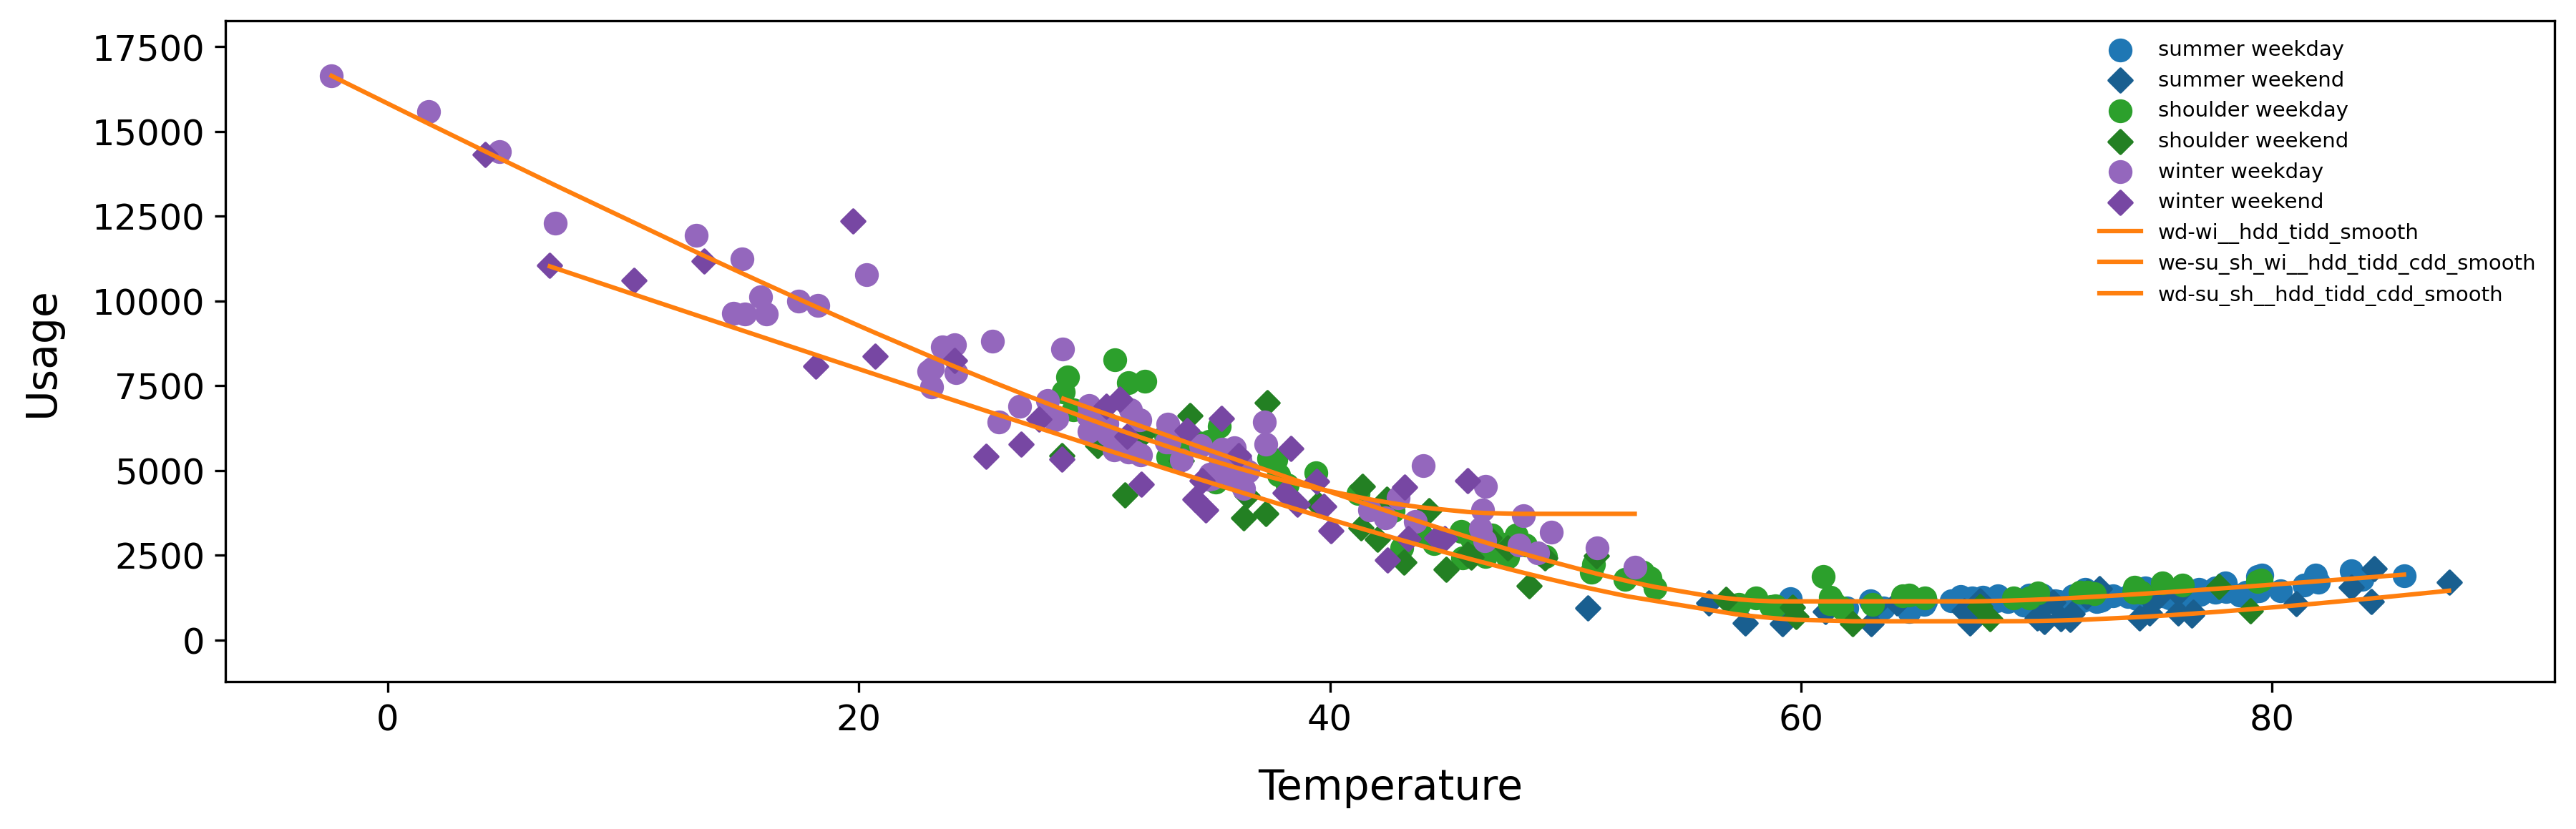

In [21]:
loaded_model = em.DailyModel.from_json(saved_model)
loaded_model.plot(baseline_data)

In [22]:
# dq'd meters - adding nans

df_baseline_dq = baseline_data.df
df_baseline_dq.loc[df_baseline_dq.index[1:37], "observed"] = np.nan

daily_baseline_data_DQ = em.DailyBaselineData(df_baseline_dq, is_electricity_data=True)

{'n_extreme_values': 1, 'median': 1994.2197000070491, 'upper_quantile': 4687.058376216576, 'lower_quantile': 1216.7427994105647, 'lower_bound': -9194.203931007469, 'upper_bound': 15098.00510663461, 'min_value': 387.183101465794, 'max_value': 16635.193672683698}
{'n_valid_observed_data_days': 328, 'n_days_total': 365.0}
{'n_valid_joint_data_days': 328, 'n_days_total': 365.0}


In [23]:
print(f"Disqualifications: {daily_baseline_data_DQ.disqualification}")
print(f"Warnings:          {daily_baseline_data_DQ.warnings}")

Disqualifications: [EEMeterWarning(qualified_name=eemeter.sufficiency_criteria.too_many_days_with_missing_observed_data), EEMeterWarning(qualified_name=eemeter.sufficiency_criteria.too_many_days_with_missing_joint_data)]
Warnings:          [EEMeterWarning(qualified_name=eemeter.sufficiency_criteria.unable_to_confirm_daily_temperature_sufficiency), EEMeterWarning(qualified_name=eemeter.sufficiency_criteria.extreme_values_detected)]


Baseline model section

Note that the only difference in how these are called are the specific data classes and model used. Everything else remains the same.

- still has daily temp, but observed only present once per month


In [24]:
df_baseline, df_reporting = odsm.test_data.load_test_data("monthly_treatment_data")

In [25]:
print(df_baseline)

                                  temperature       observed
id     datetime                                             
108618 2018-01-01 00:00:00-06:00    -2.384038  257406.539278
       2018-01-02 00:00:00-06:00     1.730000            NaN
       2018-01-03 00:00:00-06:00    13.087946            NaN
       2018-01-04 00:00:00-06:00     4.743269            NaN
       2018-01-05 00:00:00-06:00     4.130577            NaN
...                                       ...            ...
120841 2018-12-27 00:00:00-06:00    52.010625            NaN
       2018-12-28 00:00:00-06:00    35.270000            NaN
       2018-12-29 00:00:00-06:00    29.630000            NaN
       2018-12-30 00:00:00-06:00    34.250000            NaN
       2018-12-31 00:00:00-06:00    43.311250            NaN

[36500 rows x 2 columns]


In [26]:
print(df_reporting)

                                  temperature       observed
id     datetime                                             
108618 2019-01-01 00:00:00-06:00    -2.384038  113307.827517
       2019-01-02 00:00:00-06:00     1.730000            NaN
       2019-01-03 00:00:00-06:00    13.087946            NaN
       2019-01-04 00:00:00-06:00     4.743269            NaN
       2019-01-05 00:00:00-06:00     4.130577            NaN
...                                       ...            ...
120841 2019-12-27 00:00:00-06:00    52.010625            NaN
       2019-12-28 00:00:00-06:00    35.270000            NaN
       2019-12-29 00:00:00-06:00    29.630000            NaN
       2019-12-30 00:00:00-06:00    34.250000            NaN
       2019-12-31 00:00:00-06:00    43.311250            NaN

[36500 rows x 2 columns]


In [ ]:
df_baseline_108618 = df_baseline.loc[108618]
df_baseline_108618

,temperature,observed
datetime,,
2018-01-01 00:00:00-06:00,-2.384038,257406.539278
2018-01-02 00:00:00-06:00,1.730000,NaN
2018-01-03 00:00:00-06:00,13.087946,NaN
2018-01-04 00:00:00-06:00,4.743269,NaN
2018-01-05 00:00:00-06:00,4.130577,NaN
...,...,...
2018-12-27 00:00:00-06:00,46.602066,NaN
2018-12-28 00:00:00-06:00,38.346724,NaN
2018-12-29 00:00:00-06:00,28.614456,NaN


In [28]:
df_reporting_108618 = df_reporting.loc[108618]
df_reporting_108618

,temperature,observed
datetime,,
2019-01-01 00:00:00-06:00,-2.384038,113307.827517
2019-01-02 00:00:00-06:00,1.730000,NaN
2019-01-03 00:00:00-06:00,13.087946,NaN
2019-01-04 00:00:00-06:00,4.743269,NaN
2019-01-05 00:00:00-06:00,4.130577,NaN
...,...,...
2019-12-27 00:00:00-06:00,46.602066,NaN
2019-12-28 00:00:00-06:00,38.346724,NaN
2019-12-29 00:00:00-06:00,28.614456,NaN


In [ ]:
billing_baseline_data = em.BillingBaselineData(df_baseline_108618, is_electricity_data=True)
billing_reporting_data = em.BillingReportingData(df_reporting_108618, is_electricity_data=True)

In [30]:
# notice that the observed usage for each day is automatically spread evenly from the monthly usage provided
print(billing_baseline_data.df)

                           season weekday_weekend  temperature     observed
datetime                                                                   
2018-01-01 00:00:00-06:00  winter         weekday    -2.384038  8303.436751
2018-01-02 00:00:00-06:00  winter         weekday     1.730000  8303.436751
2018-01-03 00:00:00-06:00  winter         weekday    13.087946  8303.436751
2018-01-04 00:00:00-06:00  winter         weekday     4.743269  8303.436751
2018-01-05 00:00:00-06:00  winter         weekday     4.130577  8303.436751
...                           ...             ...          ...          ...
2018-12-27 00:00:00-06:00  winter         weekday    46.602066  5288.700172
2018-12-28 00:00:00-06:00  winter         weekday    38.346724  5288.700172
2018-12-29 00:00:00-06:00  winter         weekend    28.614456  5288.700172
2018-12-30 00:00:00-06:00  winter         weekend    29.186923  5288.700172
2018-12-31 00:00:00-06:00  winter         weekday    36.510441  5288.700172

[365 rows x

In [31]:
billing_model = em.BillingModel().fit(billing_baseline_data, ignore_disqualification=False)
billing_model.predict(billing_reporting_data).head()

,season,day_of_week,weekday_weekend,temperature,observed,predicted,predicted_unc,heating_load,cooling_load,model_split,model_type
datetime,,,,,,,,,,,
2019-01-01 00:00:00-06:00,winter,2,weekday,-2.384038,3655.09121,9746.501160,2317.3973,8570.084692,0.0,fw-su_sh_wi,hdd_tidd_cdd
2019-01-02 00:00:00-06:00,winter,3,weekday,1.730000,3655.09121,9247.355410,2317.3973,8070.938942,0.0,fw-su_sh_wi,hdd_tidd_cdd
2019-01-03 00:00:00-06:00,winter,4,weekday,13.087946,3655.09121,7869.324859,2317.3973,6692.908391,0.0,fw-su_sh_wi,hdd_tidd_cdd
2019-01-04 00:00:00-06:00,winter,5,weekday,4.743269,3655.09121,8881.763171,2317.3973,7705.346703,0.0,fw-su_sh_wi,hdd_tidd_cdd
2019-01-05 00:00:00-06:00,winter,6,weekend,4.130577,3655.09121,8956.099560,2317.3973,7779.683092,0.0,fw-su_sh_wi,hdd_tidd_cdd


The billing model prediction function does have additional functionality built into it where it can aggregate from averaged daily data to `monthly` or `bimonthly`

In [ ]:
billing_model.predict(billing_reporting_data, aggregation="monthly")

,season,temperature,observed,predicted,predicted_unc,heating_load,cooling_load,model_split,model_type
datetime,,,,,,,,,
2019-01-01 00:00:00-06:00,winter,25.612211,113307.827517,196843.426709,12902.722101,160374.516200,0.000000,fw-su_sh_wi,hdd_tidd_cdd
2019-02-01 00:00:00-06:00,winter,29.523429,81056.766022,164506.994328,12262.513889,131567.333224,0.000000,fw-su_sh_wi,hdd_tidd_cdd
2019-03-01 00:00:00-06:00,shoulder,36.122525,62783.320515,157312.552017,12902.722101,120843.641508,0.000000,fw-su_sh_wi,hdd_tidd_cdd
2019-04-01 00:00:00-05:00,shoulder,40.599556,53542.223426,135942.352091,12692.907759,100649.858051,0.000000,fw-su_sh_wi,hdd_tidd_cdd
2019-05-01 00:00:00-05:00,shoulder,64.969863,31089.429512,59306.232295,12902.722101,22531.480638,305.841148,fw-su_sh_wi,hdd_tidd_cdd
2019-06-01 00:00:00-05:00,summer,70.262968,29346.533659,42843.666974,12692.907759,7117.580304,433.592629,fw-su_sh_wi,hdd_tidd_cdd
2019-07-01 00:00:00-05:00,summer,75.915400,32743.001296,37335.069458,12902.722101,0.000000,866.158949,fw-su_sh_wi,hdd_tidd_cdd
2019-08-01 00:00:00-05:00,summer,75.706736,33660.542162,37856.127963,12902.722101,528.296440,858.921014,fw-su_sh_wi,hdd_tidd_cdd
2019-09-01 00:00:00-05:00,summer,68.480234,30381.828023,46543.723325,12692.907759,10899.378885,351.850399,fw-su_sh_wi,hdd_tidd_cdd
